<a href="https://colab.research.google.com/github/mguedesbarros/Studies-IA/blob/main/Fase_1_Tech_Challenge.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Fase 1 - Tech Challenge**

# **Tarefas**

**Exploração de dados:**

- Carregue a base de dados e explore suas características;
- Analise estatísticas descritivas e visualize distribuições relevantes.

**Pré-processamento de dados:**

- Realize a limpeza dos dados, tratando valores ausentes (se necessário);
- Converta variáveis categóricas em formatos adequados para modelagem.


# **Modelagem:**

- Crie um modelo preditivo de regressão utilizando uma técnica à sua escolha (por exemplo: Regressão Linear, Árvores de Decisão etc);
- Divida o conjunto de dados em conjuntos de treinamento e teste.

# **Treinamento e avaliação do modelo:**

- Treine o modelo com o conjunto de treinamento.

# **Validação estatística:**

- Utilize métricas estatísticas para validar a eficácia do modelo (p-value, intervalos de confiança).

# **O que avaliaremos:**
- Apresente resultados visuais, como gráficos de previsões vs. valores reais;
- Elabore um relatório que inclua uma análise dos resultados, insights obtidos e validação estatística.


# **Observações:**
Esperamos que o modelo seja capaz de fazer previsões confiáveis dos custos médicos individuais com base nas características fornecidas.

# **Entregável:**
Como entregável, o grupo deve enviar um vídeo junto com o link do github
do projeto e o código desenvolvido, apresentando o passo a passo do que foi
utilizado, como a fonte de dados e como os modelos foram criados.
O vídeo deve estar disponível em uma plataforma como Youtube e deve
conter até 10 minutos no máximo.
Qualquer dúvida, não deixe de nos chamar no Discord, lá poderemos tirar
suas dúvidas e auxiliar nesta tarefa. Boa sorte!

Passo 1:

### **Passo 1: Carregar base de dados**

In [7]:
import pandas as pd
#carregando a base de dados
# Ler o arquivo Excel

df = pd.read_csv('dados_saude.csv')

### **Passo 2: Explorando os dados do data frame**

In [8]:
# Visualizando os 5 primeiros registros do data frame
df.head()

,Idade,Sexo,IMC,Filhos,Custos,Sedentarismo,Fumante,Comorbidade
0,34,feminino,29.59,6,33600.0,0,nao,1
1,69,masculino,39.53,2,66300.0,1,nao,0
2,74,feminino,26.49,5,75600.0,0,sim,1
3,26,masculino,40.39,1,41600.0,1,nao,0
4,55,feminino,31.38,2,54000.0,0,sim,0


In [9]:
#visualizar quantidade de linhas x colunas
df.shape

(10000, 8)

In [10]:
#visualizar as informações do data frame, para saber os tipos das colunas e se tem campo null
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Idade         10000 non-null  int64  
 1   Sexo          10000 non-null  object 
 2   IMC           10000 non-null  float64
 3   Filhos        10000 non-null  int64  
 4   Custos        10000 non-null  float64
 5   Sedentarismo  10000 non-null  int64  
 6   Fumante       10000 non-null  object 
 7   Comorbidade   10000 non-null  int64  
dtypes: float64(2), int64(4), object(2)
memory usage: 625.1+ KB


In [11]:
#Explorar dos dados do data frame
df.describe()

,Idade,IMC,Filhos,Custos,Sedentarismo,Comorbidade
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,50.387400,29.111842,3.038200,45138.645200,0.396000,0.290200
std,17.966892,7.523501,1.991165,20355.218914,0.489089,0.453877
min,18.000000,18.510000,0.000000,16000.000000,0.000000,0.000000
25%,34.000000,23.130000,1.000000,30000.000000,0.000000,0.000000
50%,54.000000,27.950000,3.000000,40320.000000,0.000000,0.000000
75%,67.000000,33.432500,5.000000,54600.000000,1.000000,1.000000
max,74.000000,49.980000,6.000000,163800.000000,1.000000,1.000000


### **Passo 3: Realizar tratamento do data frame**

In [12]:
#renomear titulo das colunas (lower case) e remover espacos se tiver
df.columns = df.columns.str.lower().str.strip().str.replace(' ', '_')

In [13]:
#colocar as colunas sexo e fumante em valores númericos
df['sexo'] = df['sexo'].map({'feminino': 0, 'masculino': 1})
df['fumante'] = df['fumante'].map({'nao': 0, 'sim': 1})



In [14]:
#verificar se os dados foram modificados
print((df['sexo'].isin([0, 1])).all())
print((df['fumante'].isin([0, 1])).all())

df.head()

True
True


,idade,sexo,imc,filhos,custos,sedentarismo,fumante,comorbidade
0,34,0,29.59,6,33600.0,0,0,1
1,69,1,39.53,2,66300.0,1,0,0
2,74,0,26.49,5,75600.0,0,1,1
3,26,1,40.39,1,41600.0,1,0,0
4,55,0,31.38,2,54000.0,0,1,0


In [15]:
#verificar se os tipos das colunas 'sexo' e 'fumante' estão como int
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   idade         10000 non-null  int64  
 1   sexo          10000 non-null  int64  
 2   imc           10000 non-null  float64
 3   filhos        10000 non-null  int64  
 4   custos        10000 non-null  float64
 5   sedentarismo  10000 non-null  int64  
 6   fumante       10000 non-null  int64  
 7   comorbidade   10000 non-null  int64  
dtypes: float64(2), int64(6)
memory usage: 625.1 KB


### **Passo 4: Explorar os dados após o tratamento do data frame**

In [16]:
#Explorando os dados
df.describe()

,idade,sexo,imc,filhos,custos,sedentarismo,fumante,comorbidade
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,50.387400,0.491200,29.111842,3.038200,45138.645200,0.396000,0.293200,0.290200
std,17.966892,0.499948,7.523501,1.991165,20355.218914,0.489089,0.455252,0.453877
min,18.000000,0.000000,18.510000,0.000000,16000.000000,0.000000,0.000000,0.000000
25%,34.000000,0.000000,23.130000,1.000000,30000.000000,0.000000,0.000000,0.000000
50%,54.000000,0.000000,27.950000,3.000000,40320.000000,0.000000,0.000000,0.000000
75%,67.000000,1.000000,33.432500,5.000000,54600.000000,1.000000,1.000000,1.000000
max,74.000000,1.000000,49.980000,6.000000,163800.000000,1.000000,1.000000,1.000000


array([[<Axes: title={'center': 'idade'}>,
        <Axes: title={'center': 'sexo'}>,
        <Axes: title={'center': 'imc'}>],
       [<Axes: title={'center': 'filhos'}>,
        <Axes: title={'center': 'custos'}>,
        <Axes: title={'center': 'sedentarismo'}>],
       [<Axes: title={'center': 'fumante'}>,
        <Axes: title={'center': 'comorbidade'}>, <Axes: >]], dtype=object)

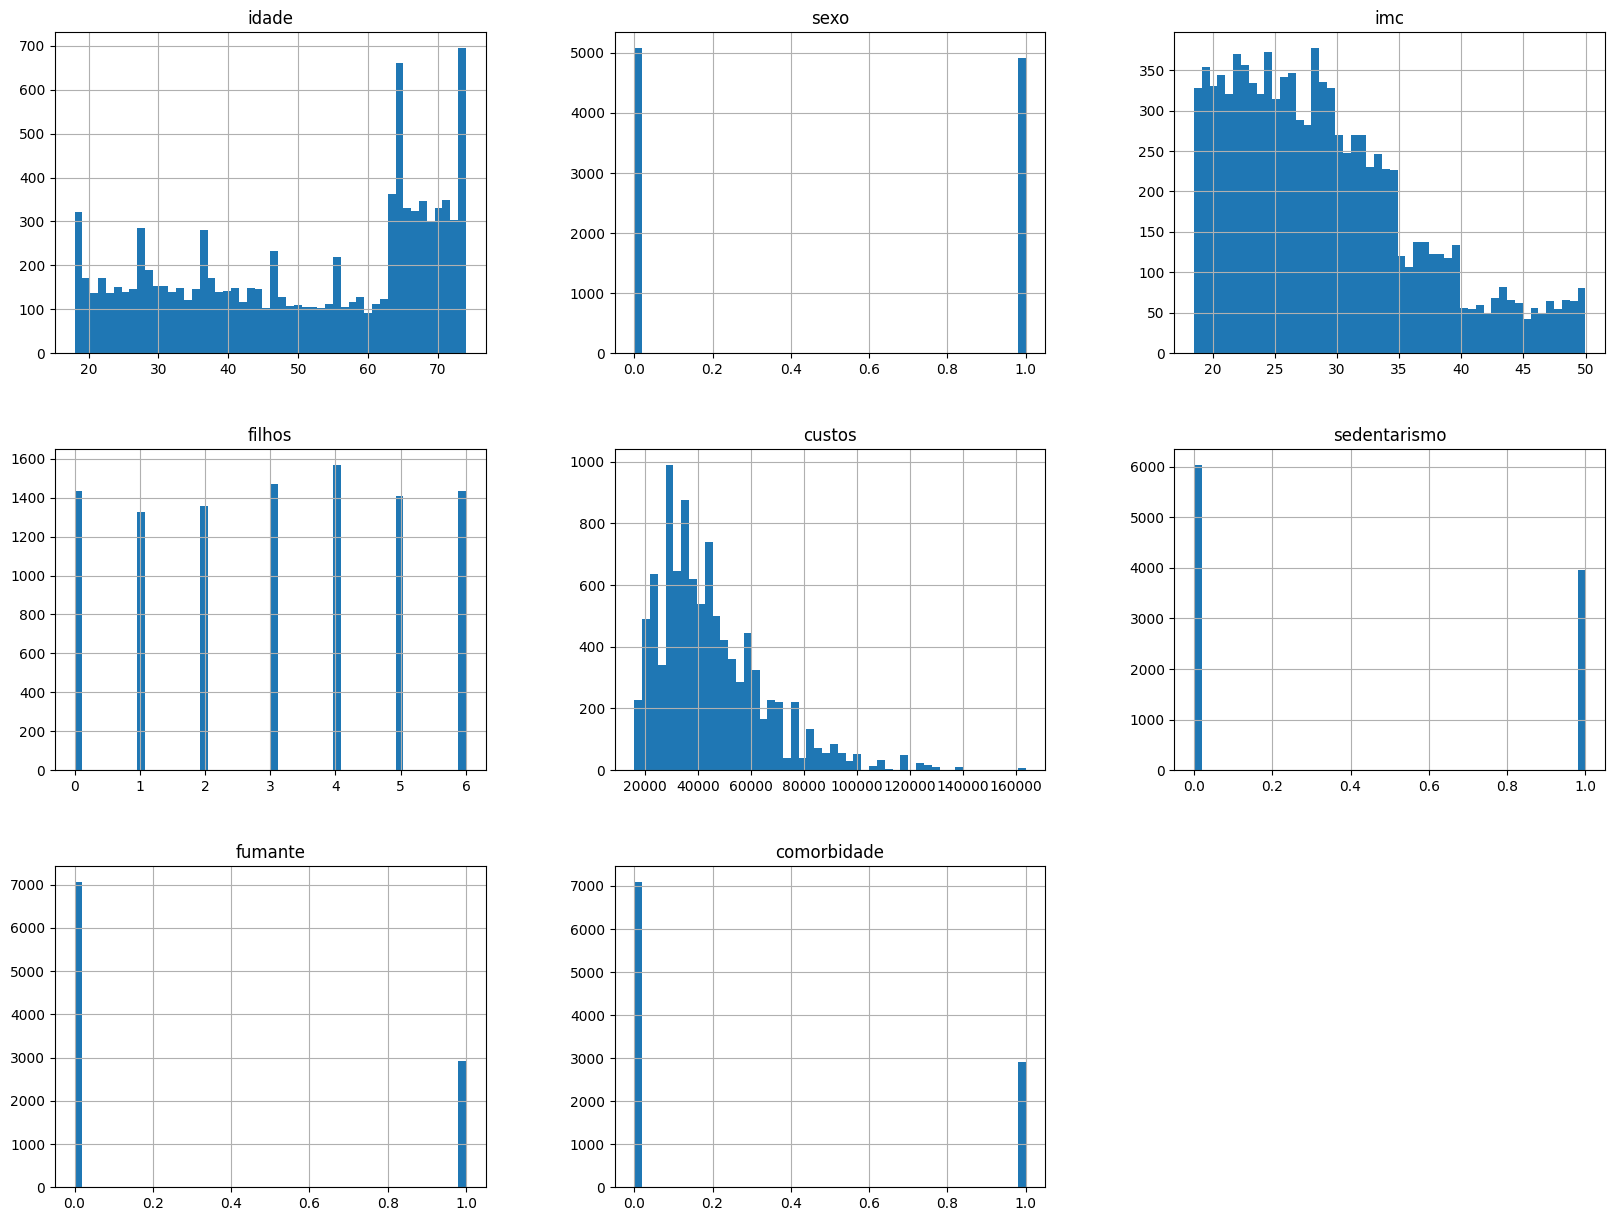

In [17]:
#criar histograma das colunas para entender as distribuição dos valores em forma de grafico

import matplotlib.pyplot as plt
df.hist(bins=50, figsize=(20,15))

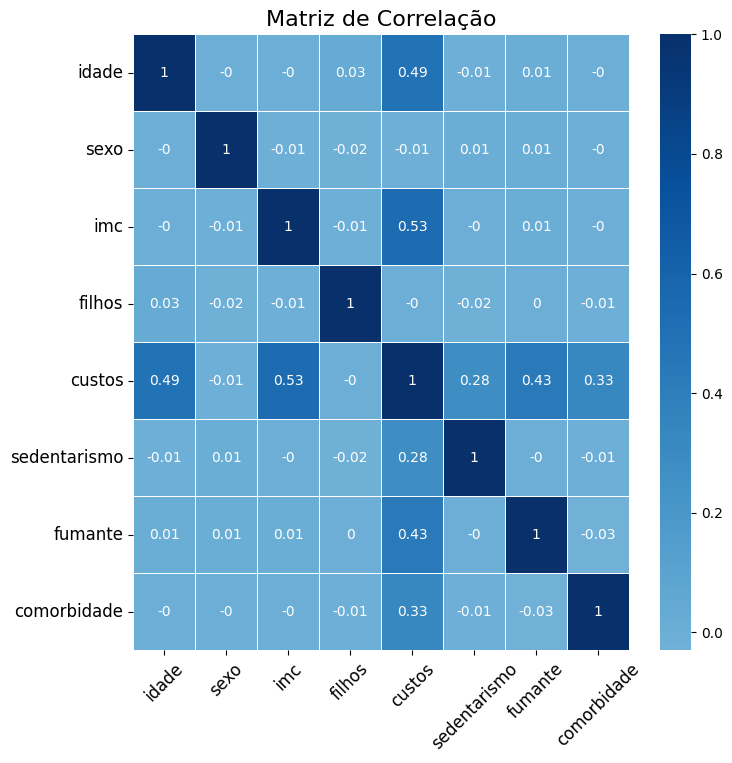

In [18]:
#criar analise de correlação, utilizando heatmap
import matplotlib.pyplot as plt
import seaborn as sb

correlation_matrix = df.corr().round(2)

fig, ax = plt.subplots(figsize=(8,8))
sb.heatmap(data=correlation_matrix, annot=True, linewidths=.5, ax=ax, cmap='Blues', center=0)
plt.title('Matriz de Correlação', fontsize=16)
plt.xticks(fontsize=12, rotation=45)
plt.yticks(fontsize=12, rotation=0)
plt.show()

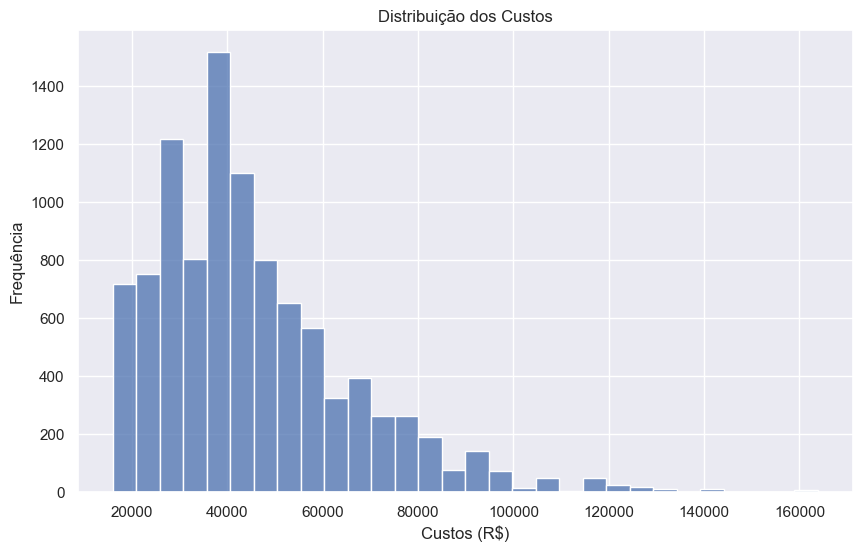

In [19]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Configuração para melhor visualização dos gráficos
plt.style.use('default')  # Usando estilo padrão
plt.rcParams['figure.figsize'] = (10, 6)
sns.set_theme()  # Configuração básica do seaborn


# Distribuição de Custos
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='custos', bins=30)
plt.title('Distribuição dos Custos')
plt.xlabel('Custos (R$)')
plt.ylabel('Frequência')
plt.show()

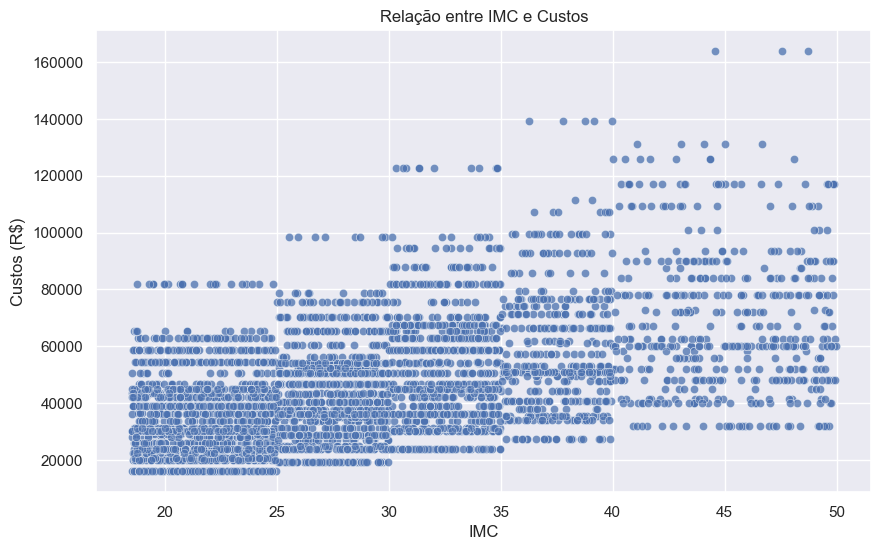

In [20]:
# Relação entre IMC e Custos
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='imc', y='custos', alpha=0.5)
plt.title('Relação entre IMC e Custos')
plt.xlabel('IMC')
plt.ylabel('Custos (R$)')
plt.show()


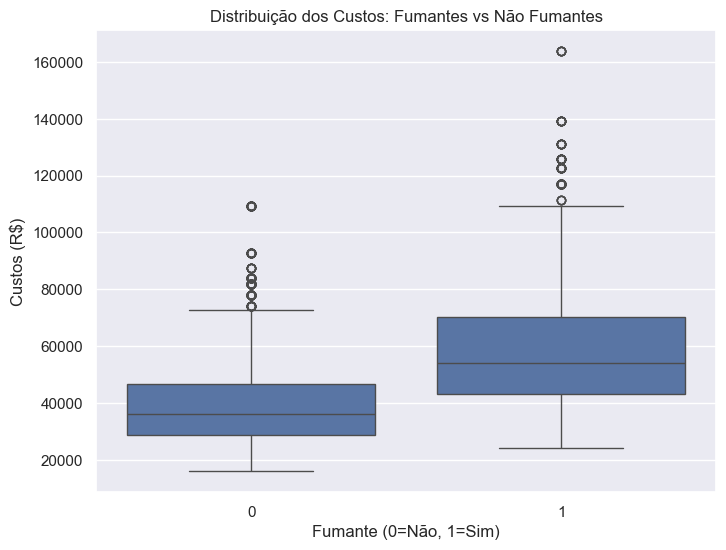

In [21]:
# Comparação de custos entre fumantes e não fumantes
plt.figure(figsize=(8, 6))
sns.boxplot(data=df, x='fumante', y='custos')
plt.title('Distribuição dos Custos: Fumantes vs Não Fumantes')
plt.xlabel('Fumante (0=Não, 1=Sim)')
plt.ylabel('Custos (R$)')
plt.show()

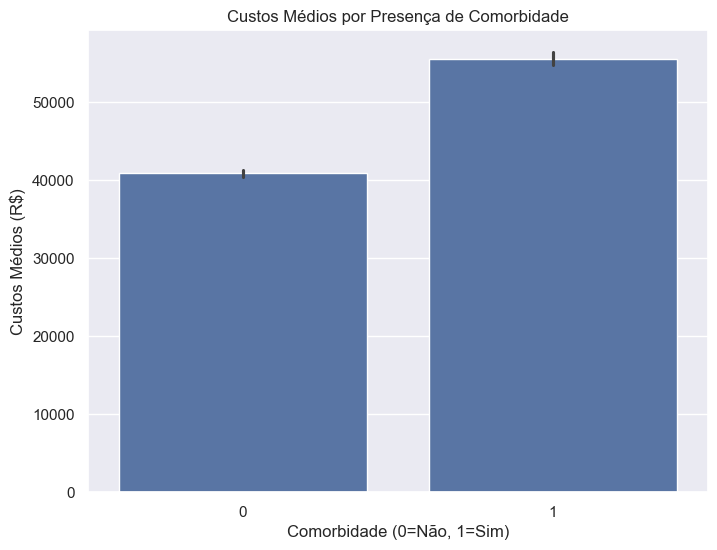

In [22]:
# Custos médios por comorbidade
plt.figure(figsize=(8, 6))
sns.barplot(data=df, x='comorbidade', y='custos')
plt.title('Custos Médios por Presença de Comorbidade')
plt.xlabel('Comorbidade (0=Não, 1=Sim)')
plt.ylabel('Custos Médios (R$)')
plt.show()

### **Passo 5: Realizar o treinamento do modelo - Regressão Linear**

In [23]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

#variaveis independentes (X) e alvo (Y)
X = df.drop(columns=['custos']) # Remove a coluna de custos
y = df['custos']  # Define custos como target

In [24]:
# separar colunas categoricas
col_categoricas = ["sexo", "fumante"]

In [25]:
#criar pipeline de pre-processamento
pre_processamento = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(), col_categoricas)
    ],
    remainder="passthrough") #manter as colunas numericas)

In [26]:
#criar pipelina com pre_processamento + modelo de regressão
modelo = Pipeline(steps=[("pre_processamento", pre_processamento),
                         ("modelo", LinearRegression())])

In [27]:
# Dividir dados em treino e teste (80% treino, 20% teste)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print("Tamanho do conjunto de treino:", X_train.shape)
print("Tamanho do conjunto de teste:", X_test.shape)

#treinar modelo
modelo.fit(X_train, y_train)

#fazer previsões
y_pred = modelo.predict(X_test)

Tamanho do conjunto de treino: (8000, 7)
Tamanho do conjunto de teste: (2000, 7)


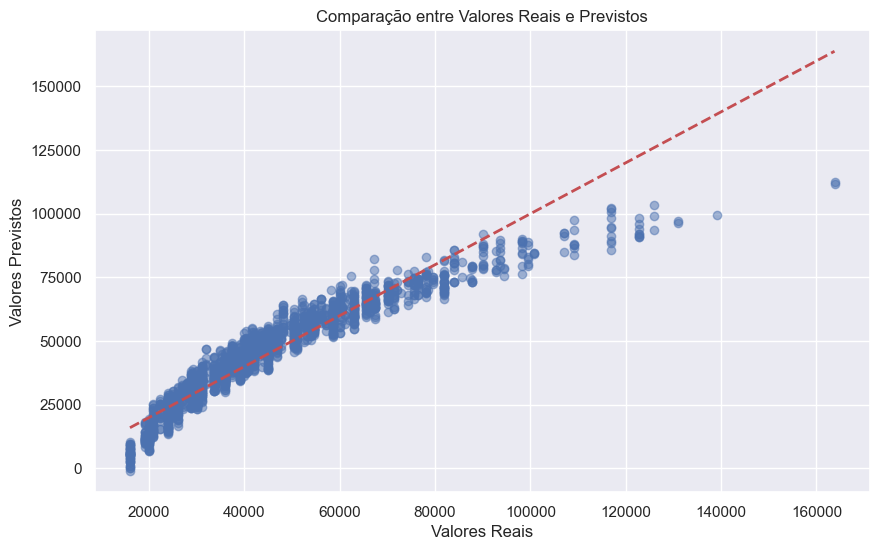


R² Score: 0.8958
RMSE: 6703.58
MAE: 4818.99


In [28]:
 # Criar gráfico de dispersão: Valores Reais vs Previstos
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Valores Reais')
plt.ylabel('Valores Previstos')
plt.title('Comparação entre Valores Reais e Previstos')
plt.show()

# Calcular e mostrar métricas básicas
from sklearn.metrics import r2_score, mean_squared_error
r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mae = mean_absolute_error(y_test, y_pred)

print(f'\nR² Score: {r2:.4f}') #Indica quanto da variabilidade dos dados é explicada pelo modelo
print(f'RMSE: {rmse:.2f}') #Mostra o erro médio do modelo na mesma unidade da variável prevista (neste caso, em R$)
print(f'MAE: {mae:.2f}') #Erro Absoluto Médio - A média das diferenças absolutas entre os valores reais e os valores previstos.

In [29]:
# Avaliação qualitativa do modelo baseada no R²
if r2 >= 0.9:
    print("\nAvaliação: Modelo excelente")
elif r2 >= 0.8:
    print("\nAvaliação: Modelo bom")
elif r2 >= 0.6:
    print("\nAvaliação: Modelo moderado")
else:
    print("\nAvaliação: Modelo limitado")



Avaliação: Modelo bom


In [32]:
#arvore de decisao
from sklearn.tree import DecisionTreeRegressor
from sklearn import tree

dt = DecisionTreeRegressor(random_state=7, max_depth =5, min_samples_split=20, min_samples_leaf=6)

#treinar modelo
dt.fit(X_train, y_train)




DecisionTreeRegressor(max_depth=5, min_samples_leaf=6, min_samples_split=20,
                      random_state=7)

[Text(0.5, 0.9166666666666666, 'x[2] <= 29.985\nsquared_error = 409954336.979\nsamples = 8000\nvalue = 45011.162'),
 Text(0.25, 0.75, 'x[0] <= 43.5\nsquared_error = 194199895.857\nsamples = 4890\nvalue = 37179.293'),
 Text(0.375, 0.8333333333333333, 'True  '),
 Text(0.125, 0.5833333333333334, 'x[5] <= 0.5\nsquared_error = 77993467.221\nsamples = 1849\nvalue = 27475.613'),
 Text(0.0625, 0.4166666666666667, 'x[6] <= 0.5\nsquared_error = 36416101.825\nsamples = 1340\nvalue = 24075.152'),
 Text(0.03125, 0.25, 'x[4] <= 0.5\nsquared_error = 17833948.004\nsamples = 964\nvalue = 21688.382'),
 Text(0.015625, 0.08333333333333333, 'squared_error = 8569353.386\nsamples = 591\nvalue = 19530.288'),
 Text(0.046875, 0.08333333333333333, 'squared_error = 13441617.837\nsamples = 373\nvalue = 25107.775'),
 Text(0.09375, 0.25, 'x[4] <= 0.5\nsquared_error = 32006774.713\nsamples = 376\nvalue = 30194.426'),
 Text(0.078125, 0.08333333333333333, 'squared_error = 17710924.139\nsamples = 235\nvalue = 27375.66')

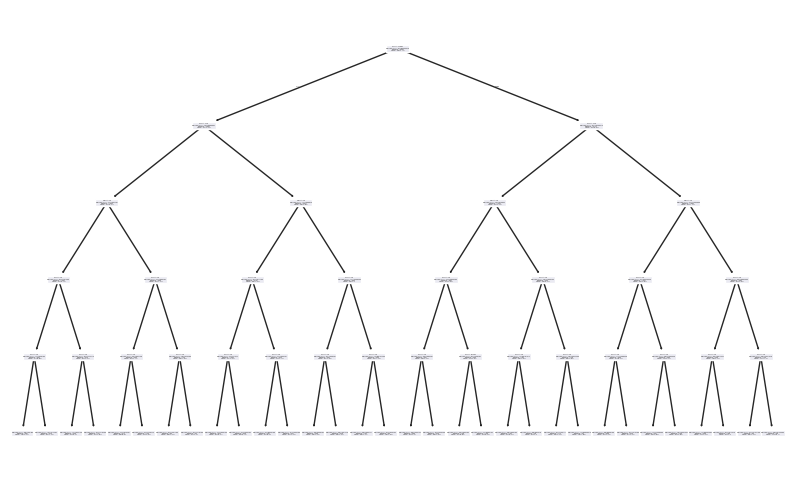

In [33]:
tree.plot_tree(dt)

In [34]:
# Análise da Árvore de Decisão
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

# Fazer predições
y_pred = dt.predict(X_test)

# Calcular métricas de avaliação
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("=== MÉTRICAS DO MODELO ===")
print(f"MSE (Erro Quadrático Médio): {mse:.2f}")
print(f"RMSE (Raiz do Erro Quadrático Médio): {rmse:.2f}")
print(f"MAE (Erro Absoluto Médio): {mae:.2f}")
print(f"R² (Coeficiente de Determinação): {r2:.4f}")

=== MÉTRICAS DO MODELO ===
MSE (Erro Quadrático Médio): 54206299.60
RMSE (Raiz do Erro Quadrático Médio): 7362.49
MAE (Erro Absoluto Médio): 5092.93
R² (Coeficiente de Determinação): 0.8743
